<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/PipeMask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/Mask_RCNN
import sys
sys.path.append("/content/Mask_RCNN/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

In [ ]:
!nvidia-smi

In [6]:
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 40 images


In [8]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Train: 36
Validation: 4
Classes: 1


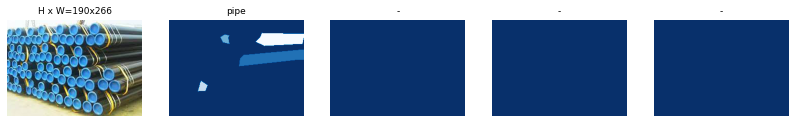

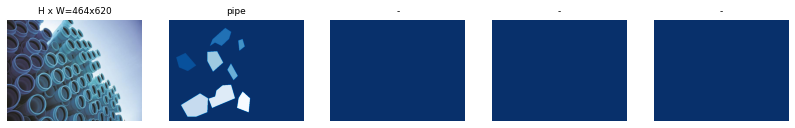

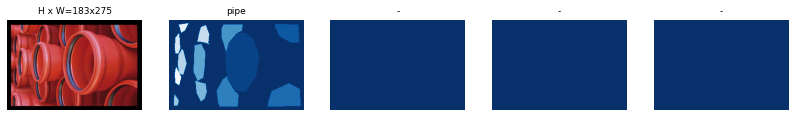

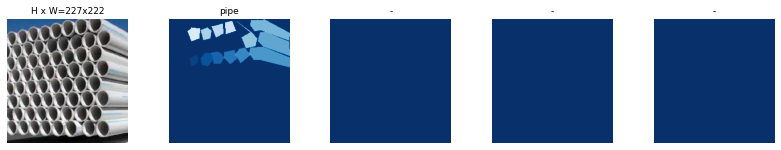

In [9]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

In [12]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Re-starting from epoch 1


original_image           shape: (512, 512, 3)         min:    0.00000  max:  254.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


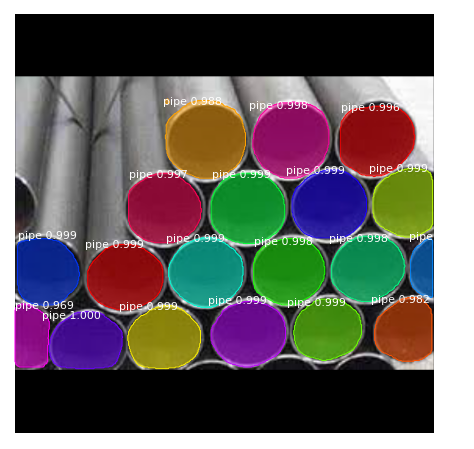

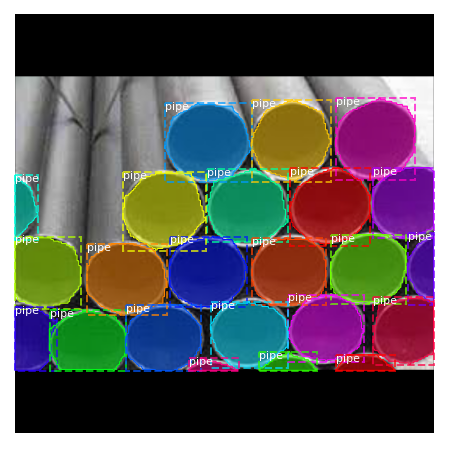

In [29]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)